In [48]:
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
InteractiveShell.ast_node_interactivity = "all"

test:[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


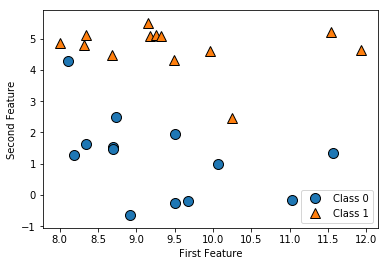

In [49]:
#生成數據
X,y = mglearn.datasets.make_forge()
print("test:{}".format(y))
#數據集繪圖
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0","Class 1"], loc = 4)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.show()

(-3, 3)

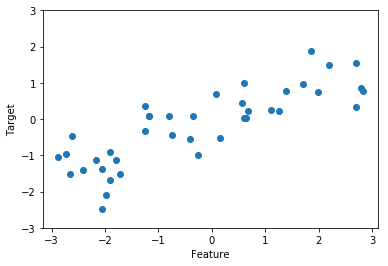

In [50]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [51]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [52]:
print("Shape of cancer data:{}".format(cancer.data.shape))

Shape of cancer data:(569, 30)


In [53]:
#dictionary: {k:v for k, v in zip()}
print("Sample counts per class:\n{}".format(
    {k: v for k, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [54]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [55]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Type of datasets: %", type(boston))
print("Data shape:{}".format(boston.data.shape))

Type of datasets: % <class 'sklearn.utils.Bunch'>
Data shape:(506, 13)


In [56]:
#Feature engineering
X, y = mglearn.datasets.load_extended_boston()
#13個特徵+13 plus 13的交互項
print("Data shape: {}".format(X.shape))

Data shape: (506, 104)


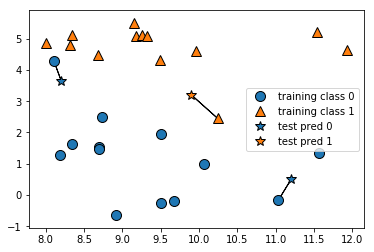

In [57]:
## K近鄰
mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

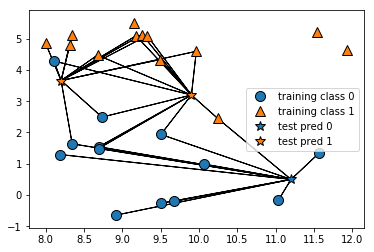

In [58]:
mglearn.plots.plot_knn_classification(n_neighbors=12)
plt.show()

In [59]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [60]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors = 3)
clf.fit(X_train, y_train)
print("Test set prediciotns: {}".format(clf.predict(X_test)))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

Test set prediciotns: [1 0 1 0 1 0 0]


In [61]:
print("Test set accuracy;{:.2f}%".format(clf.score(X_test, y_test)))

Test set accuracy;0.86%


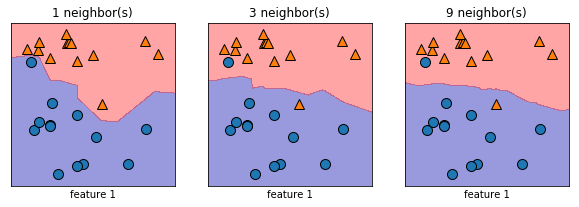

In [62]:
#决策边界decision boundary
fig, axes = plt.subplots(1, 3, figsize=(10 ,3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_xlabel("feature 1")
    
plt.show()

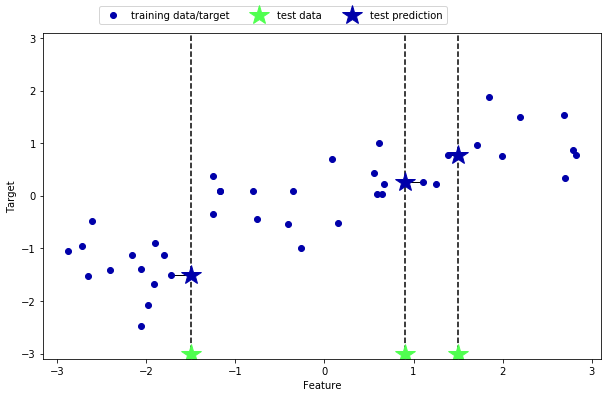

In [63]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [64]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X ,y , random_state=0)
reg = KNeighborsRegressor(n_neighbors = 3)
reg.fit(X_train, y_train)
print('Test set prediction: \{}'.format(reg.predict(X_test)))

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

Test set prediction: \[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [65]:
print('Test set R^2: {:.2f}'.format(reg.score(X_test, y_test)))

Test set R^2: 0.83


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=9, p=2,
          weights='uniform')

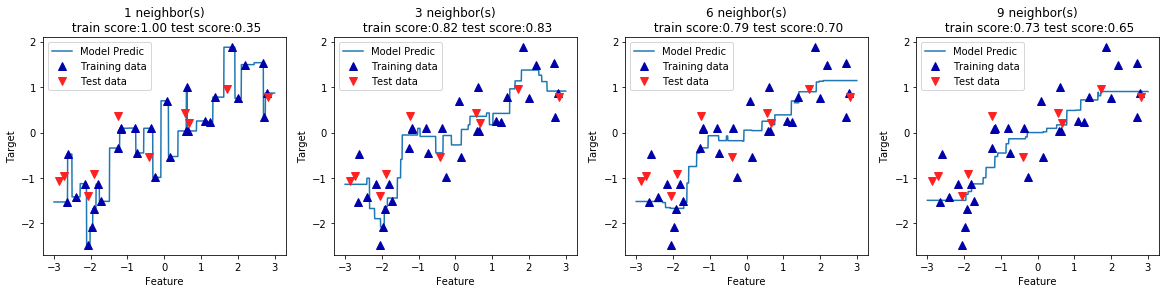

In [80]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
line = np.linspace(-3, 3, 1000).reshape(-1,1)
#print('Linespace： {}'.format(line))
for n_nb, ax in zip([1,3,6,9], axes):
    reg = KNeighborsRegressor(n_neighbors=n_nb)
    reg.fit(X_train, y_train)
    #用随机生成的数据套用模型,生成回归线
    ax.plot(line, reg.predict(line))
    #训练数据打点
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0) ,markersize=8)
    #测试数据打点
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1) ,markersize=8)
    ax.set_title(
    "{} neighbor(s)\n train score:{:.2f} test score:{:.2f}".format(
    n_nb, reg.score(X_train, y_train), reg.score(X_test, y_test)
    ))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    ax.legend(["Model Predic", "Training data", "Test data"], loc="best")